In [1]:
from FinancialMachineLearning.generator.stochasticprocess import *

In [2]:
stochastic = GeometricBrownianMotion(mu = 0, sigma = 0.028, 
                                          n_paths = 1, n_steps = 10000, 
                                          start = 10, end = 252, initial_price = 1000)

In [3]:
simulation = stochastic.simulate()

In [4]:
simulation

,0
2023-09-20 17:10:16.356522,1000.000000
2023-09-21 17:10:16.356522,1001.161556
2023-09-22 17:10:16.356522,1003.746463
2023-09-25 17:10:16.356522,997.269950
2023-09-26 17:10:16.356522,1001.710581
...,...
2062-01-12 17:10:16.356522,2145.336119
2062-01-13 17:10:16.356522,2142.114727
2062-01-16 17:10:16.356522,2149.462849
2062-01-17 17:10:16.356522,2150.237947


<Axes: >

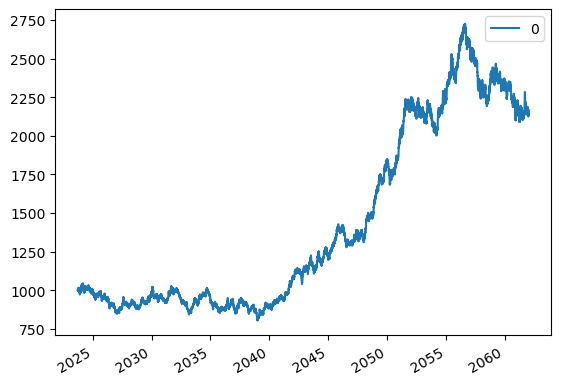

In [5]:
simulation.plot()

In [6]:
from FinancialMachineLearning.features.fracdiff import *

In [7]:
simulation.columns = ['close']

In [8]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 1, 11):
    try:
        df1 = np.log(simulation).dropna()
        df2 = FractionalDifferentiatedFeatures.fracDiff(df1, d = d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index,'close'], df2['close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-0.065153,9.528007e-01,1.0,9998.0,-2.861829,1.000000
0.2,0.892354,9.929897e-01,1.0,4.0,-4.474365,0.994755
0.3,-0.301459,9.252975e-01,1.0,11.0,-3.189369,0.870825
0.4,-1.946898,3.103303e-01,1.0,27.0,-2.976430,0.781229
0.5,-3.601922,5.724380e-03,1.0,68.0,-2.905087,0.560449
0.6,-5.555988,1.580552e-06,1.0,180.0,-2.877735,0.526304
0.7,-10.805686,1.966082e-19,1.0,513.0,-2.867190,0.199744
0.8,-22.362359,0.000000e+00,1.0,1559.0,-2.863396,0.150762
0.9,-42.858483,0.000000e+00,1.0,4653.0,-2.862161,-0.020664
1.0,-69.928112,0.000000e+00,1.0,9997.0,-2.861829,0.010646


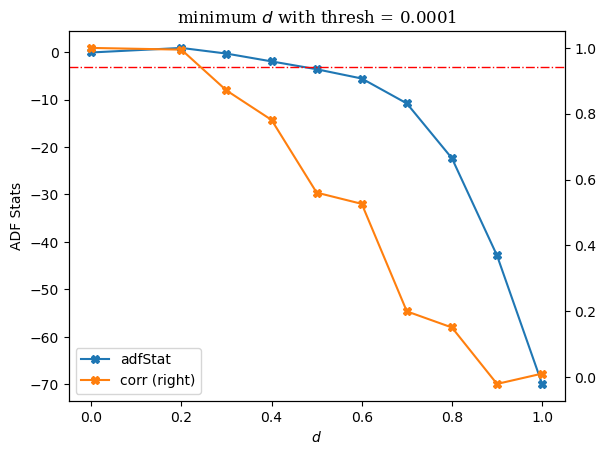

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
ax.set_title(r'minimum $d$ with thresh = 0.0001', fontfamily = 'Serif', fontsize = 12)
ax.set_xlabel(r'$d$')
ax.set_ylabel('ADF Stats');
display(out)

In [10]:
fracdiff = FractionalDifferentiatedFeatures.fracDiff_FFD(simulation, 0.5)

<Axes: >

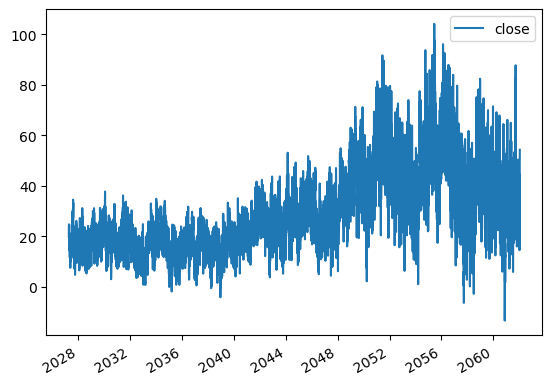

In [11]:
fracdiff.plot()

In [12]:
from FinancialMachineLearning.features.entropy import *
cont_etp = ContinuousEntropy(ret = fracdiff, period = 50)

In [13]:
apen = cont_etp.continuous_entropy()

<Axes: >

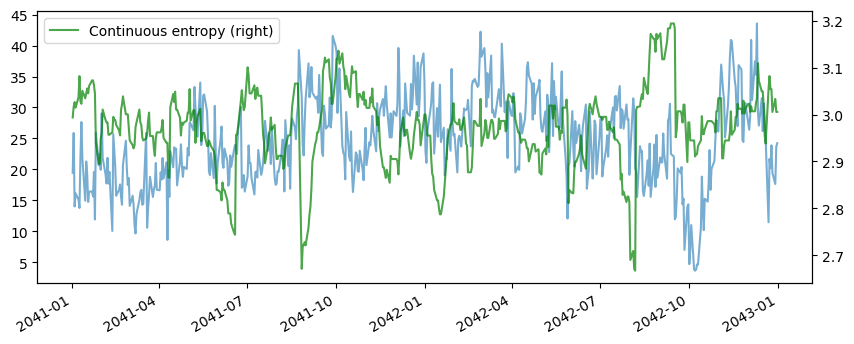

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(fracdiff.loc['2041' : '2042'], alpha = 0.6)
apen.loc['2041' : '2042'].plot(secondary_y = True, ax = ax, alpha = 0.7, color = 'green')

#### Discrete Entropy

In [15]:
fracdiff

,close
2027-04-08 17:10:16.356522,23.940105
2027-04-09 17:10:16.356522,19.375056
2027-04-12 17:10:16.356522,24.638389
2027-04-13 17:10:16.356522,18.856526
2027-04-14 17:10:16.356522,17.076706
...,...
2062-01-12 17:10:16.356522,44.407045
2062-01-13 17:10:16.356522,33.905468
2062-01-16 17:10:16.356522,41.542056
2062-01-17 17:10:16.356522,38.601022


In [16]:
quantile = pd.qcut(fracdiff.close, q = 10, labels = range(10))
quantile

2027-04-08 17:10:16.356522    4
2027-04-09 17:10:16.356522    3
2027-04-12 17:10:16.356522    4
2027-04-13 17:10:16.356522    2
2027-04-14 17:10:16.356522    2
                             ..
2062-01-12 17:10:16.356522    8
2062-01-13 17:10:16.356522    6
2062-01-16 17:10:16.356522    7
2062-01-17 17:10:16.356522    7
2062-01-18 17:10:16.356522    9
Name: close, Length: 9075, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [17]:
message = ''.join(map(str, quantile.values))
message

'434221121333221230232231302002001101112232313311011123301133442455543334245445346556656653233322112230110013224231021144322200001112132011143102434235230113410210211111110010120112121021212133212234320111000000000112311325422202234322223433100212232333332243222432532346553300134245443313332103232122131200101320014233434213100012233334110010212000000110001131210010000132120231002111044323011410000202212302242000001122110022000212232312434123222324000101232432534312234445435424244554412455443425553241446445542101122442221101001232132222343202110342143432331222112021000131311443333130121123231211320010213122342412124352556542453555435553321330010100233233322034243225454554555634543344123342442345345545566564355556535666675655654224431112443532210010000022113221200323402101011434222311233224412233543433333224421534412143431421211202100001120000012113110121011121143223543225454554124342344221111112224343365411243151363331113120114221041121031013320011000012222011233330110212101123002111111

In [18]:
etp = []
for i in range(10, len(message)) :
    etp.append(konto_entropy(message[i-10:i]))
etp = pd.DataFrame(etp, columns = ['Konto Entropy'], index = quantile.index[10:])
etp

,Konto Entropy
2027-04-22 17:10:16.356522,1.507682
2027-04-23 17:10:16.356522,1.439874
2027-04-26 17:10:16.356522,1.163020
2027-04-27 17:10:16.356522,1.030284
2027-04-28 17:10:16.356522,1.241015
...,...
2062-01-12 17:10:16.356522,1.439874
2062-01-13 17:10:16.356522,1.666178
2062-01-16 17:10:16.356522,1.639874
2062-01-17 17:10:16.356522,1.666178


Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion')

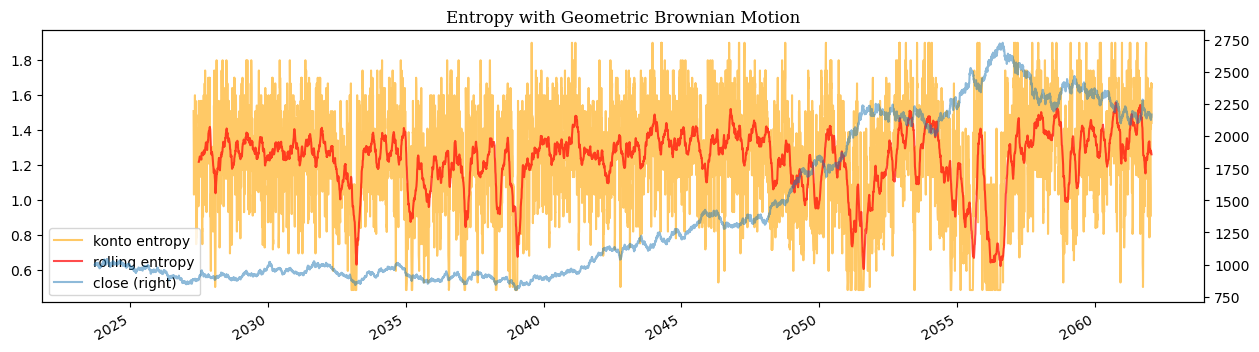

In [19]:
fig, ax = plt.subplots(figsize = (15, 4))
ax.plot(etp, color = 'orange', alpha = 0.6, label = 'konto entropy')
ax.plot(etp.rolling(window = 50).mean(), color = 'red', alpha = 0.7, label = 'rolling entropy')
ax.legend()
simulation.plot(secondary_y = True, ax = ax, alpha = 0.5, label = 'Geometric Brownian Motion')
plt.title('Entropy with Geometric Brownian Motion', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion (window = 50)')

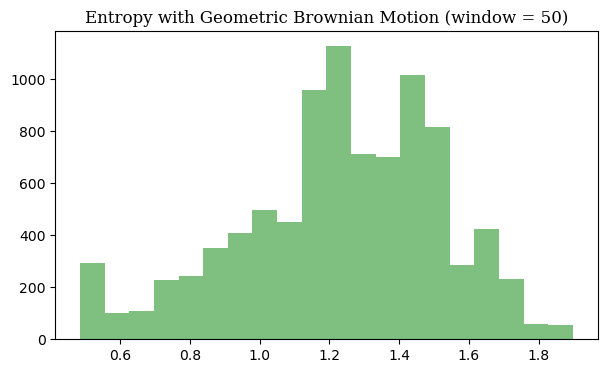

In [20]:
plt.figure(figsize = (7,4))
plt.hist(etp, bins = 20, color = 'g', alpha = 0.5)
plt.title('Entropy with Geometric Brownian Motion (window = 50)', fontsize = 12, fontfamily = 'Serif')

In [21]:
probs = np.ones_like(etp) / len(etp)
cdf_etp = np.cumsum(probs)

In [22]:
probs

array([[0.00011031],
       [0.00011031],
       [0.00011031],
       ...,
       [0.00011031],
       [0.00011031],
       [0.00011031]])

In [23]:
matrix = pd.concat([pd.Series(etp.values.reshape(-1)), pd.Series(probs.reshape(-1))], axis = 1)
matrix.index = etp.index
matrix.columns = ['Konto entropy', 'probability']
matrix

,Konto entropy,probability
2027-04-22 17:10:16.356522,1.507682,0.00011
2027-04-23 17:10:16.356522,1.439874,0.00011
2027-04-26 17:10:16.356522,1.163020,0.00011
2027-04-27 17:10:16.356522,1.030284,0.00011
2027-04-28 17:10:16.356522,1.241015,0.00011
...,...,...
2062-01-12 17:10:16.356522,1.439874,0.00011
2062-01-13 17:10:16.356522,1.666178,0.00011
2062-01-16 17:10:16.356522,1.639874,0.00011
2062-01-17 17:10:16.356522,1.666178,0.00011


In [24]:
matrix['cum_prob'] = matrix.groupby('Konto entropy')['probability'].transform(lambda x: x / x.sum())
matrix

,Konto entropy,probability,cum_prob
2027-04-22 17:10:16.356522,1.507682,0.00011,0.004032
2027-04-23 17:10:16.356522,1.439874,0.00011,0.003135
2027-04-26 17:10:16.356522,1.163020,0.00011,0.009615
2027-04-27 17:10:16.356522,1.030284,0.00011,0.007299
2027-04-28 17:10:16.356522,1.241015,0.00011,0.007937
...,...,...,...
2062-01-12 17:10:16.356522,1.439874,0.00011,0.003135
2062-01-13 17:10:16.356522,1.666178,0.00011,0.005495
2062-01-16 17:10:16.356522,1.639874,0.00011,0.004149
2062-01-17 17:10:16.356522,1.666178,0.00011,0.005495


Text(0.5, 1.0, 'Structural Change prediction with Brownian Motion')

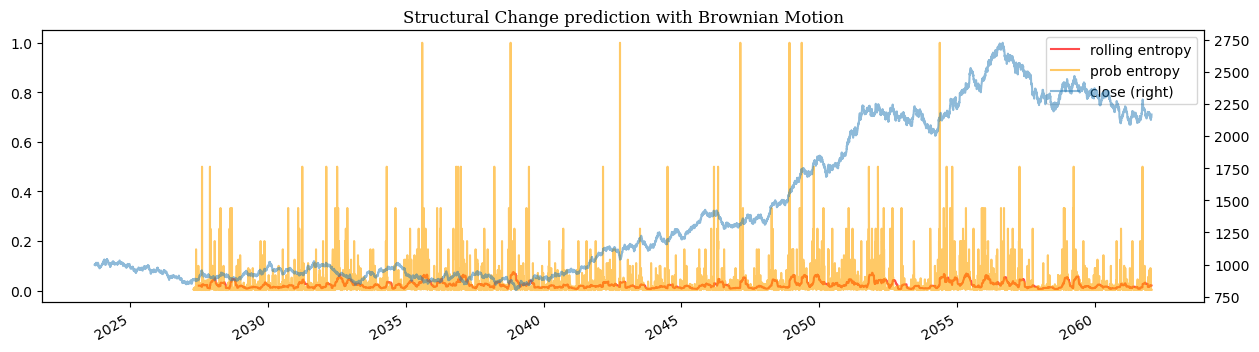

In [25]:
fig, ax = plt.subplots(figsize = (15, 4))
#ax.plot(etp, color = 'orange', alpha = 0.6, label = 'konto entropy')
ax.plot(matrix.cum_prob.rolling(window = 50).mean(), color = 'red', alpha = 0.7, label = 'rolling entropy')
ax.plot(matrix.cum_prob, color = 'orange', alpha = 0.6, label = 'prob entropy')
ax.legend()
simulation.plot(secondary_y = True, ax = ax, alpha = 0.5, label = 'Geometric Brownian Motion')
plt.title('Structural Change prediction with Brownian Motion', fontsize = 12, fontfamily = 'Serif')